In [1]:
from pathways.scenarios import run_scenarios, load_scenario_table
from pathways.simulation import load_configuration
from pathways.outputs import save_scenario_result_to_pandas

In [2]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [188]:
from pathlib import Path
datadir = Path("tests/test_summaries")
basic_config = load_configuration(datadir / "config.yml")
# Modify a directory for the plots here
plotsdir = Path("plots")
# Make sure the directory exists
plotsdir.mkdir(exist_ok=True)

# Load csv with configurations for each example scenario
contaminate_examples = load_scenario_table(datadir / "contaminate_examples.csv")
sample_examples = load_scenario_table(datadir / "sampling_examples.csv")

# Contamination examples

In [69]:
# Run infestation validation test 1
num_consignments_1 = 3
contaminate_validation_1 = run_scenarios(
    config=basic_config,
    scenario_table=contaminate_examples,
    seed=42,
    num_simulations=1,
    num_consignments=num_consignments_1,
    detailed=True,
)

Running scenario: contaminate validation 3
Running scenario: contaminate validation 8
Running scenario: contaminate validation 1
Running scenario: contaminate validation 6
Running scenario: contaminate validation 2
Running scenario: contaminate validation 7
Running scenario: contaminate validation 13
Running scenario: contaminate validation 11
Running scenario: contaminate validation 12
Running scenario: contaminate validation 5
Running scenario: contaminate validation 4
Running scenario: contaminate validation 10
Running scenario: contaminate validation 9
Running scenario: contaminate validation 15
Running scenario: contaminate validation 14


In [70]:
# Separate item and inspection details from simulation totals and scenario config.
contaminate_validation_details_1 = [i[0] for i in contaminate_validation_1]
contaminate_validation_results_1 = [i[1:3] for i in contaminate_validation_1]

In [71]:
# Save dataframe from simulation totals and scenario config test 1.
contaminate_validation_df_1 = save_scenario_result_to_pandas(
    contaminate_validation_results_1,
    config_columns=[
        "consignment name",
        "consignment/boxes/min",
        "consignment/boxes/max",
        "consignment/items_per_box/default",
        "contamination/contamination_unit",
        "contamination/contamination_rate/distribution",
        "contamination/contamination_rate/value",
        "contamination/contamination_rate/parameters",
        "contamination/arrangement",
        "contamination/clustered/distribution",
        "contamination/clustered/contaminated_units_per_cluster",
        "contamination/clustered/random/cluster_item_width",
    ],
    result_columns=[
        "true_contamination_rate",
    ],
)

In [72]:
# Use items from only the test 1 consignment (smaller consignments for easier visualization)
contaminate_validation_items_unstacked = [i[0] for i in contaminate_validation_details_1]

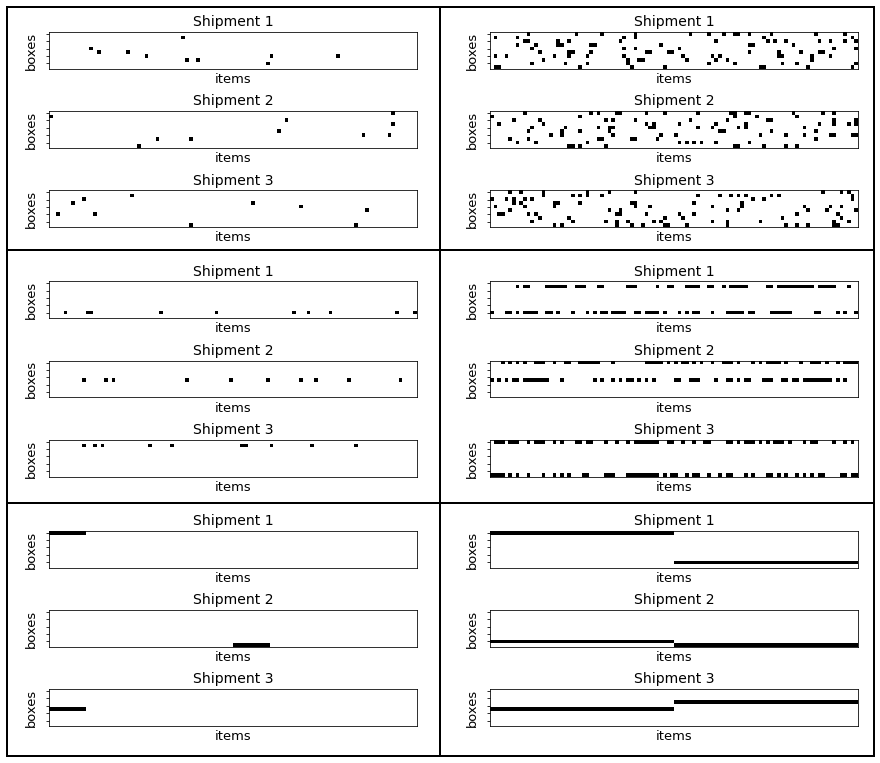

In [73]:
# Plot items for each scenario and check contaminant arrangement and contamination unit
scenarios = contaminate_validation_df_1["consignment name"]

fig11 = plt.figure(figsize=(14.5, 13), constrained_layout=False)
outer_grid = fig11.add_gridspec(3, 2)

scenario_index = 0
for a in range(3):
    for b in range(2):
        # gridspec inside gridspec
        inner_grid = outer_grid[a, b].subgridspec(3, 1, wspace=0.01, hspace=0.6)
        axs = inner_grid.subplots()  # Create all subplots for the inner grid.
        contaminate_validation_items = np.stack(contaminate_validation_items_unstacked[scenario_index])
        items_by_consignment = np.vsplit(contaminate_validation_items, num_consignments_1)
        for i in range(len(items_by_consignment)):
            axs[i].matshow(items_by_consignment[i], cmap='Greys')
            axs[i].set_yticklabels([])
            axs[i].tick_params(labeltop=False, top=False, bottom=False)
            #if i == 1:
            axs[i].set_ylabel('boxes', fontsize=13)
            #if i == 2:
            axs[i].set_xlabel('items', fontsize=13)
            #if i == 0:
            axs[i].set_title("Shipment " + str(i + 1), fontsize=14)
        scenario_index += 1


from pylab import *
axs[i].plot([0.5, 0.5], [0.1, 0.9], color='black', lw=2,
         transform=gcf().transFigure, clip_on=False)
axs[i].plot([0.085, 0.915], [.37, .37], color='black', lw=2,
         transform=gcf().transFigure, clip_on=False)
axs[i].plot([0.085, 0.915], [.64, .64], color='black', lw=2,
         transform=gcf().transFigure, clip_on=False)
axs[i].plot([0.085, 0.915], [0.9, 0.9], color='black', lw=2,
         transform=gcf().transFigure, clip_on=False)
axs[i].plot([0.085, 0.915], [0.1, 0.1], color='black', lw=2,
         transform=gcf().transFigure, clip_on=False)
axs[i].plot([0.915, 0.915], [0.1, 0.9], color='black', lw=2,
         transform=gcf().transFigure, clip_on=False)
axs[i].plot([0.085, 0.085], [0.1, 0.9], color='black', lw=2,
         transform=gcf().transFigure, clip_on=False)

plt.show()

#fig11.savefig(plotsdir / "contam_examples_items.jpg", dpi=300)

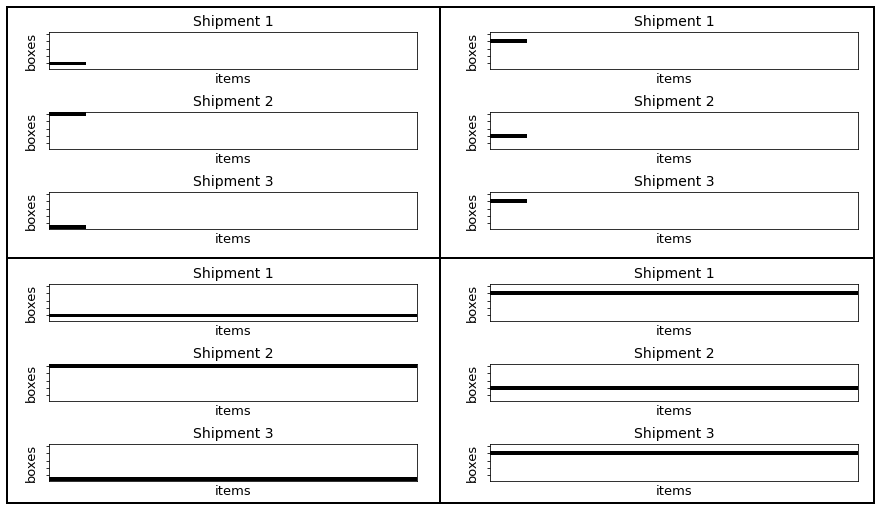

In [74]:
# Plot items for each scenario and check contaminant arrangement and contamination unit
scenarios = contaminate_validation_df_1["consignment name"]

fig11 = plt.figure(figsize=(14.5, 8.5), constrained_layout=False)
outer_grid = fig11.add_gridspec(2, 2)

scenario_index = 9
for a in range(2):
    for b in range(2):
        # gridspec inside gridspec
        inner_grid = outer_grid[a, b].subgridspec(3, 1, wspace=0.01, hspace=0.6)
        axs = inner_grid.subplots()  # Create all subplots for the inner grid.
        contaminate_validation_items = np.stack(contaminate_validation_items_unstacked[scenario_index])
        items_by_consignment = np.vsplit(contaminate_validation_items, num_consignments_1)
        for i in range(len(items_by_consignment)):
            axs[i].matshow(items_by_consignment[i], cmap='Greys')
            axs[i].set_yticklabels([])
            axs[i].tick_params(labeltop=False, top=False, bottom=False)
            #if i == 1:
            axs[i].set_ylabel('boxes', fontsize=13)
            #if i == 2:
            axs[i].set_xlabel('items', fontsize=13)
            #if i == 0:
            axs[i].set_title("Shipment " + str(i + 1), fontsize=14)
        scenario_index += 1


from pylab import *
axs[i].plot([0.5, 0.5], [0.1, 0.91], color='black', lw=2,
         transform=gcf().transFigure, clip_on=False)
axs[i].plot([0.085, 0.915], [.5, .5], color='black', lw=2,
         transform=gcf().transFigure, clip_on=False)
axs[i].plot([0.085, 0.915], [0.91, 0.91], color='black', lw=2,
         transform=gcf().transFigure, clip_on=False)
axs[i].plot([0.085, 0.915], [0.1, 0.1], color='black', lw=2,
         transform=gcf().transFigure, clip_on=False)
axs[i].plot([0.915, 0.915], [0.1, 0.91], color='black', lw=2,
         transform=gcf().transFigure, clip_on=False)
axs[i].plot([0.085, 0.085], [0.1, 0.91], color='black', lw=2,
         transform=gcf().transFigure, clip_on=False)

plt.show()

#fig11.savefig(plotsdir / "contam_examples_boxes.jpg", dpi=300)

# Sampling examples

In [189]:
# Run sampling validation test
num_consignments = 1
sample_validation = run_scenarios(
    config=basic_config,
    scenario_table=sample_examples,
    seed=42,
    num_simulations=1,
    num_consignments=num_consignments,
    detailed=True,
)

Running scenario: sample validation 5
Running scenario: sample validation 6
Running scenario: sample validation 7
Running scenario: sample validation 8
Running scenario: sample validation 11
Running scenario: sample validation 12
Running scenario: sample validation 17
Running scenario: sample validation 18
Running scenario: sample validation 19
Running scenario: sample validation 20
Running scenario: sample validation 23
Running scenario: sample validation 24


In [190]:
# Separate item and inspection details from simulation totals and scenario config.
sample_validation_details = [i[0] for i in sample_validation]
sample_validation_results = [i[1:3] for i in sample_validation]

In [191]:
# Save simulation totals and scenario config to dataframe.
sample_validation_df = save_scenario_result_to_pandas(
    sample_validation_results,
    config_columns=[
        "inspection name",
        "consignment/boxes/min",
        "consignment/boxes/max",
        "consignment/items_per_box/default",
        "inspection/unit",
        "inspection/sample_strategy",
        "inspection/proportion/value",
        "inspection/hypergeometric/detection_level",
        "inspection/selection_strategy",
    ],
    result_columns=[
        "avg_boxes_opened_completion",
        "avg_items_inspected_completion",
    ],
)

In [194]:
actual_item_sample_size = sample_validation_df["avg_items_inspected_completion"]
actual_item_sample_size

In [196]:
item_example_indexes = [0,6,1,7,2,8,3,9]
box_example_indexes = [4,10,5,11]

In [197]:
sample_validation_inspected_indexes = [i[1] for i in sample_validation_details]

In [198]:
# Use the smaller consignment (20 boxes) sample scenarios (first 12) for plotting the inspected indexes so the consignments are easier to visualize.
item_scenarios = sample_validation_df.iloc[item_example_indexes,:]
item_inspected_indexes = [sample_validation_inspected_indexes[i] for i in item_example_indexes]
box_scenarios = sample_validation_df.iloc[box_example_indexes,:]
box_inspected_indexes = [sample_validation_inspected_indexes[i] for i in box_example_indexes]

num_items_per_consignment = 2000
num_boxes_per_consignment = 20


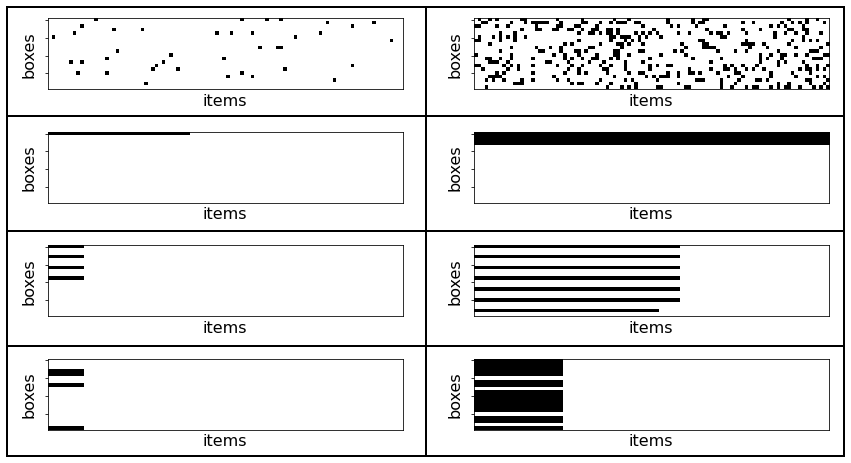

In [199]:
a = 4  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(14,8))

for index in range(len(item_scenarios)):
    indexes = np.zeros(num_items_per_consignment, dtype=np.int)
    inpsected = item_inspected_indexes[index][0]
    np.put(indexes, inpsected, 1)
    indexes = np.array_split(indexes, num_boxes_per_consignment)
    axs = plt.subplot(a, b, c)
    axs.matshow(indexes, cmap='binary', vmin=0, vmax=1)
    axs.set_yticklabels([])
    axs.tick_params(labeltop=False, top=False, bottom=False)
    axs.set_ylabel('boxes', fontsize=16)
    axs.set_xlabel('items', fontsize=16)
    c = c + 1


from pylab import *
axs.plot([0.5, 0.5], [0.1, 0.88], color='black', lw=2,
         transform=gcf().transFigure, clip_on=False)
axs.plot([0.085, 0.915], [.49, .49], color='black', lw=2,
         transform=gcf().transFigure, clip_on=False)
axs.plot([0.085, 0.915], [0.88, 0.88], color='black', lw=2,
         transform=gcf().transFigure, clip_on=False)
axs.plot([0.085, 0.915], [0.1, 0.1], color='black', lw=2,
         transform=gcf().transFigure, clip_on=False)
axs.plot([0.915, 0.915], [0.1, 0.88], color='black', lw=2,
         transform=gcf().transFigure, clip_on=False)
axs.plot([0.085, 0.085], [0.1, 0.88], color='black', lw=2,
         transform=gcf().transFigure, clip_on=False)
axs.plot([0.085, 0.915], [0.69, 0.69], color='black', lw=2,
         transform=gcf().transFigure, clip_on=False)
axs.plot([0.085, 0.915], [0.29, 0.29], color='black', lw=2,
         transform=gcf().transFigure, clip_on=False)

plt.show()

fig.savefig(plotsdir / "sample_examples_items.jpg", dpi=300)

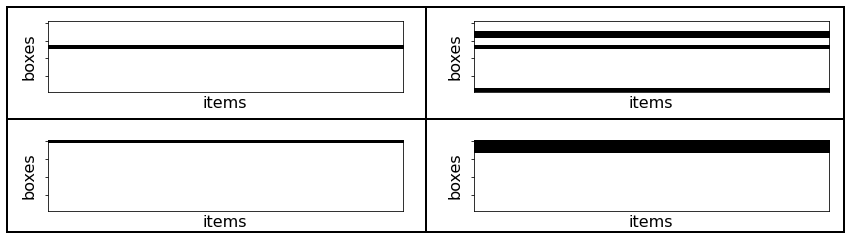

In [203]:
a = 2  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(14,4))

for index in range(len(box_scenarios)):
    indexes = np.zeros(num_items_per_consignment, dtype=np.int)
    inpsected = box_inspected_indexes[index][0]
    np.put(indexes, inpsected, 1)
    indexes = np.array_split(indexes, num_boxes_per_consignment)
    axs = plt.subplot(a, b, c)
    axs.matshow(indexes, cmap='binary', vmin=0, vmax=1)
    axs.set_yticklabels([])
    axs.tick_params(labeltop=False, top=False, bottom=False)
    axs.set_ylabel('boxes', fontsize=16)
    axs.set_xlabel('items', fontsize=16)
    c = c + 1


from pylab import *
axs.plot([0.5, 0.5], [0.1, 0.88], color='black', lw=2,
         transform=gcf().transFigure, clip_on=False)
axs.plot([0.085, 0.915], [.49, .49], color='black', lw=2,
         transform=gcf().transFigure, clip_on=False)
axs.plot([0.085, 0.915], [0.88, 0.88], color='black', lw=2,
         transform=gcf().transFigure, clip_on=False)
axs.plot([0.085, 0.915], [0.1, 0.1], color='black', lw=2,
         transform=gcf().transFigure, clip_on=False)
axs.plot([0.915, 0.915], [0.1, 0.88], color='black', lw=2,
         transform=gcf().transFigure, clip_on=False)
axs.plot([0.085, 0.085], [0.1, 0.88], color='black', lw=2,
         transform=gcf().transFigure, clip_on=False)

plt.show()

fig.savefig(plotsdir / "sample_examples_boxes.jpg", dpi=300)